In [265]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dt_apriltags import Detector

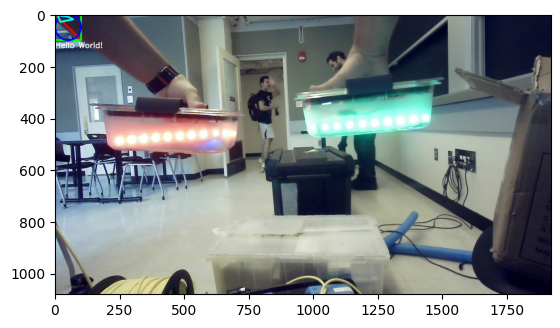

In [266]:
# reading the image
img = cv2.imread('image.jpg')
plt.imshow(img)

# drawing a line on image
cv2.line(img, (0, 0), (100, 100), (255, 0, 0), 5)

# drawing a rectangle on image
cv2.rectangle(img, (0, 0), (100, 100), (0, 255, 0), 5)

#drawing a circle on image
cv2.circle(img, (50, 50), 50, (0, 0, 255), 5)

# drawing a polygon on image
pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.polylines(img, [pts], True, (0, 255, 255), 5)

# drawing text on image
cv2.putText(img, 'Hello World!', (0, 130), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

#visulize the image
plt.imshow(img)


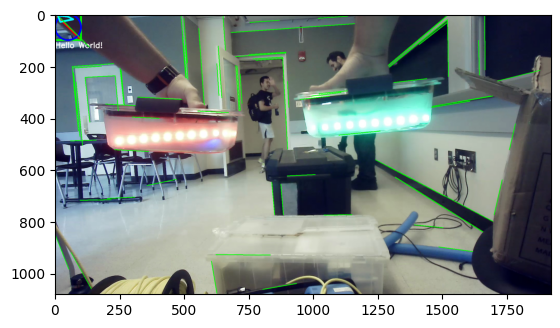

In [267]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray, 50, 150, apertureSize=3) # detect edges
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=100,
                maxLineGap=10,
        ) # detect lines

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(img)

[[[252 132 371 309]]

 [[ 42 310 205 141]]

 [[ 12 302 212 128]]

 [[ 35 283 204 136]]

 [[289 129 466 197]]

 [[ 10 185 176 128]]]
<class 'numpy.ndarray'>


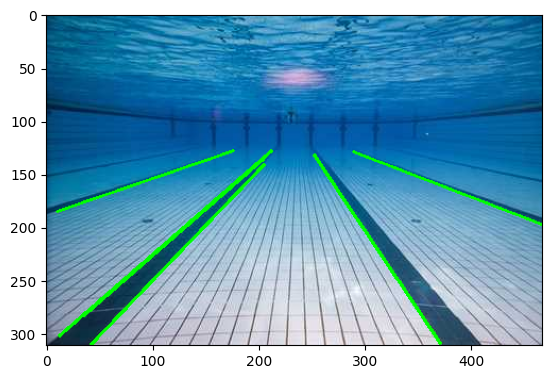

In [268]:
#Image from google
img = cv2.imread('pool.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray,60,370, apertureSize=3) # detect edges
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=165,
                maxLineGap=10,
        ) # detect lines
print(lines)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

print(type(lines))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

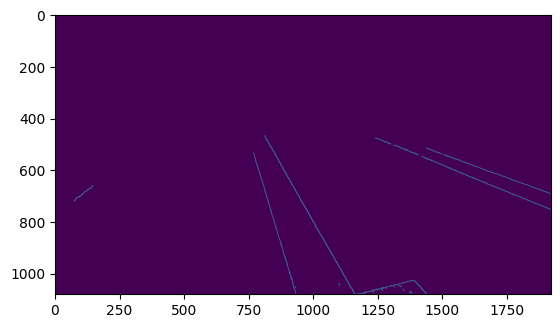

In [269]:
#BWSI pool
img = cv2.imread('rov_pool.jpg')
slopes = []

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray,600,1200, apertureSize=5) # detect edges
plt.imshow(edges)


slopes:  [1.7303754266211604, 3.2777777777777777]
2


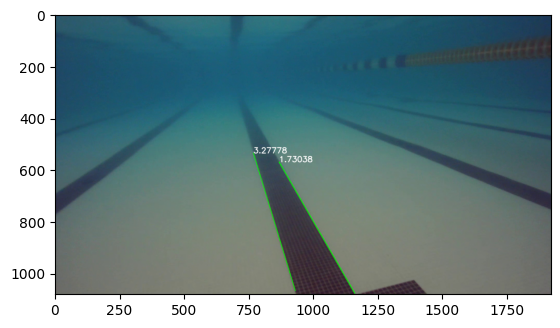

In [270]:
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=500,
                maxLineGap=30,
        ) # detect lines
for line in lines:
    x1, y1, x2, y2 = line[0]
    slope = (y2-y1)/(x2-x1)
    cv2.putText(img, f'{round(slope,5)}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    slopes.append(slope)
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
print("slopes: ", slopes)
print(len(slopes))

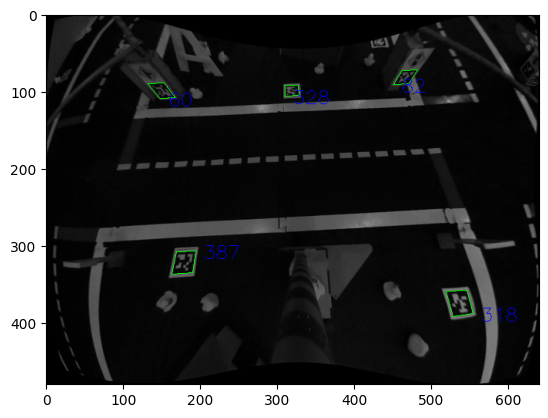

In [271]:
img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)

at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)
tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))
    
plt.imshow(color_img)

In [311]:
def get_slopes(frame:np.ndarray):
    img = frame
    slopes = []
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
    edges = cv2.Canny(gray,600,1200, apertureSize=5) # detect edges
    lines = cv2.HoughLinesP(
                    edges,
                    1,
                    np.pi/180,
                    100,
                    minLineLength=500,
                    maxLineGap=30,
            ) # detect lines
    print(type(lines))
    if lines.any()!= 'NonType':
        for line in lines:
            x1, y1, x2, y2 = line[0]
            slope = (y2-y1)/(x2-x1)
            slopes.append(slope)
        print("slopes: ", slopes)
        print(len(slopes))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        return None

In [312]:
# reading the video
cap = cv2.VideoCapture('AUV_Vid.mkv')
ret, frame = cap.read()

success = cap.grab()
new_frames = []
slopes = []
while success:
    _, frame = cap.retrieve()
    slope = get_slopes(frame)
    if slopes is not None:
        new_frames.append(frame)
        slopes.append(slope)
    success = cap.grab()

<class 'numpy.ndarray'>
slopes:  [0.42401500938086306, 0.4231536926147705]
2
<class 'numpy.ndarray'>
slopes:  [0.42330097087378643]
1
<class 'numpy.ndarray'>
slopes:  [0.36396396396396397]
1
<class 'numpy.ndarray'>
slopes:  [0.42359767891682787]
1
<class 'numpy.ndarray'>
slopes:  [0.36327345309381237]
1
<class 'numpy.ndarray'>
slopes:  [0.3641114982578397]
1
<class 'NoneType'>


AttributeError: 'NoneType' object has no attribute 'any'